In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

drive.mount('/content/drive')
fch=pd.read_csv('/content/drive/My Drive/colon_cancer.csv', delimiter=';')
print("Valeurs manquantes par colonne :")
print(fch.isnull().sum().to_frame().style.background_gradient(cmap='coolwarm'))

doublon = fch.duplicated()
print("Lignes en doublon :")
print(fch[doublon].style.background_gradient(cmap='coolwarm'))
print(f"Le nombre de doublons est : {doublon.sum()}")
# Valeurs manquantes
print("Valeurs manquantes par colonne :")
print(tabulate(fch.isnull().sum().to_frame(), headers='keys', tablefmt='pretty'))

# Doublons
print("Lignes en doublon :")
print(tabulate(fch[doublon], headers='keys', tablefmt='pretty'))

# Nombre de doublons
print(f"Le nombre de doublons est : {doublon.sum()}")
print("Les deux premières lignes :")
print(tabulate(fch.head(2), headers='keys', tablefmt='pretty'))




Mounted at /content/drive
Valeurs manquantes par colonne :
Lignes en doublon :
Le nombre de doublons est : 0
Valeurs manquantes par colonne :
+---------------+---+
|               | 0 |
+---------------+---+
|   id_sample   | 0 |
|     ADH1C     | 0 |
|    DHRS11     | 0 |
|     UGP2      | 0 |
|    SLC7A5     | 0 |
|     CTSS      | 0 |
|      DAO      | 0 |
|    NIBAN1     | 0 |
|    PRUNE2     | 0 |
|     FOXF2     | 0 |
|    TENT5C     | 0 |
|     KLF10     | 0 |
|     FABP1     | 0 |
|    RPSAP19    | 0 |
|     NCAPH     | 0 |
|     TPM1      | 0 |
|   PLA2G12B    | 0 |
|    PLAAT4     | 0 |
|   IGLV8-61    | 0 |
|      GSS      | 0 |
|     L1TD1     | 0 |
|    RNF186     | 0 |
|     HES2      | 0 |
|     MXRA8     | 0 |
|     SOX18     | 0 |
|    NDFIP2     | 0 |
|     SIAE      | 0 |
|    NEURL1B    | 0 |
|     DDIT4     | 0 |
|     TRPM4     | 0 |
|    RETREG1    | 0 |
|    OTULINL    | 0 |
|     CPVL      | 0 |
|     SAMD9     | 0 |
|   ANKRD40CL   | 0 |
|     EPN3      | 0 |


In [ ]:
x = fch.drop(columns=['id_sample', 'tissue_status'])
y = fch['tissue_status']

# Afficher les premières lignes des features (X) avec un style
print('Pour X (features) :')
display(x.head().style.background_gradient(cmap='coolwarm'))
print('Pour la variable cible (Y) :')
display(y.head().to_frame().style.background_gradient(cmap='coolwarm'))






Pour X (features) :


,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,KLF10,FABP1,RPSAP19,NCAPH,TPM1,PLA2G12B,PLAAT4,IGLV8-61,GSS,L1TD1,RNF186,HES2,MXRA8,SOX18,NDFIP2,SIAE,NEURL1B,DDIT4,TRPM4,RETREG1,OTULINL,CPVL,SAMD9,ANKRD40CL,EPN3,CRYBG2,GIPC2,P3H2,STEAP3,THNSL2,TRAPPC14,RHBDL2,RPP25,SEMA4C,RNF43,EPS8L1,TOR4A,PAQR5,SIDT1,ESRP1,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,4.886495,11.467835,2.349664,3.247337,3.885083,2.651308,6.139054,11.904110,5.770764,4.364139,5.948596,3.966854,3.556926,2.881865,5.254156,5.889994,4.914704,5.841828,5.877771,4.724761,5.438257,3.378530,3.396038,4.661474,3.759601,2.993865,5.514015,2.707832,5.365839,1.199159,3.700149,4.407452,5.405844,2.355743,4.241267,3.490191,5.535112,4.593671,1.884467,6.423875,3.951686,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,5.947794,11.446051,2.317281,3.864902,6.123759,3.288092,5.483532,6.396734,5.849056,2.479617,6.368401,2.150372,4.164269,2.112857,5.003747,4.982537,4.736504,4.358380,5.528074,4.068301,3.146043,3.948589,3.665220,3.482330,3.442059,3.819261,5.077481,3.141183,4.682382,2.923585,3.914042,4.135014,4.203456,3.611138,4.002000,2.779211,6.077375,4.929379,0.965589,5.338636,4.269728,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,4.666943,12.648347,2.168907,2.458414,6.304856,3.344240,6.947121,8.232526,4.433916,3.419027,5.181060,3.092117,3.796801,3.090768,5.432594,3.360218,4.996818,4.907265,5.528074,5.136233,2.268182,2.710736,4.198905,3.966393,3.963999,3.464319,4.728705,3.257489,3.725541,2.788248,3.599745,3.057578,3.975977,2.141414,3.447174,0.883263,4.480359,3.619404,3.283126,6.820828,4.050933,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,4.666943,4.592964,2.539841,3.829740,6.606685,2.558167,5.483532,7.476612,5.716387,2.825716,5.729064,1.428367,3.462739,2.683305,5.168688,6.446582,5.100944,4.129678,3.661231,3.767945,2.195027,3.658879,4.632524,3.519565,4.520735,3.641790,4.066030,3.567639,4.272307,2.619077,2.571137,5.122664,3.845989,4.231688,3.655234,3.597071,4.754134,3.867237,3.210703,5.613117,4.357246,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,5.777013,12.407888,2.057627,3.056172,7.874365,3.007352,5.306127,3.589052,4.964594,2.281847,4.222054,3.625773,5.233266,2.846290,5.135700,3.360218,5.231102,4.221159,6.006752,2.700013,4.828611,3.211144,2.931402,4.636635,3.546447,2.647953,4.170663,2.792264,3.725541,3.058922,4.228339,4.000334,4.333443,3.447835,3.863294,4.154703,5.575456,4.256689,1.363916,7.095309,1.906739,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305


Pour la variable cible (Y) :


,tissue_status
0,normal
1,normal
2,normal
3,normal
4,normal


Distribution des classes (normal vs cancer) :
tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


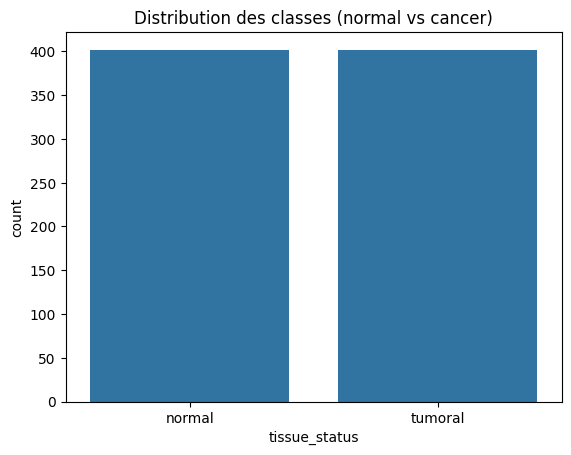

In [ ]:
# Analyser la data
distribution_classe=y.value_counts()
print("Distribution des classes (normal vs cancer) :")
print(distribution_classe)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title("Distribution des classes (normal vs cancer)")
plt.show()

In [ ]:
# Split des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)


# Affichage clair des tailles
print("==== Résumé des tailles des ensembles ====\n")
print(f"Ensemble d'entraînement :\n - Taille Features: {x_train.shape[0]}\n - Taille Target: {y_train.shape[0]}")
print(f"\nEnsemble de test :\n - Taille Features: {x_test.shape[0]}\n - Taille Target: {y_test.shape[0]}")
print(y_train.value_counts())
print(y_test.value_counts())


==== Résumé des tailles des ensembles ====

Ensemble d'entraînement :
 - Taille Features: 643
 - Taille Target: 643

Ensemble de test :
 - Taille Features: 161
 - Taille Target: 161
tissue_status
normal     323
tumoral    320
Name: count, dtype: int64
tissue_status
tumoral    82
normal     79
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Normalisation pour la partie d'entraînement
scaler = MinMaxScaler()
scaler.fit(x_train)
X_normalized_train = scaler.transform(x_train)
X_normalized_df_train = pd.DataFrame(X_normalized_train, columns=x_train.columns).round(3)
print("\n==== Aperçu des données normalisées pour l'entraînement ====\n")
pd.set_option('display.max_columns', None)
print(X_normalized_df_train.head(5))
X_normalized_test = scaler.transform(x_test)
X_normalized_df_test = pd.DataFrame(X_normalized_test, columns=x_train.columns).round(3)
print("\n==== Aperçu des données normalisées pour les données de test ====\n")
pd.set_option('display.max_columns', None)
print(X_normalized_df_test.head(5))





==== Aperçu des données normalisées pour l'entraînement ====

   ADH1C  DHRS11   UGP2  SLC7A5   CTSS    DAO  NIBAN1  PRUNE2  FOXF2  TENT5C  \
0  0.945   0.520  0.823   0.462  0.306  0.820   0.444   0.141  0.739   0.795   
1  0.976   0.803  0.941   0.139  0.857  0.837   0.525   0.444  0.855   0.263   
2  0.065   0.479  0.521   0.814  0.703  0.552   0.126   0.384  0.375   0.297   
3  0.915   0.867  0.812   0.158  0.777  0.810   0.088   0.000  0.503   0.968   
4  0.445   0.292  0.411   0.726  0.384  0.722   0.272   0.510  0.226   0.186   

   KLF10  FABP1  RPSAP19  NCAPH   TPM1  PLA2G12B  PLAAT4  IGLV8-61    GSS  \
0  0.479  0.190    0.429  0.017  0.610     0.484   0.424     0.637  0.669   
1  0.470  0.160    0.214  0.466  0.483     0.661   0.812     0.790  0.632   
2  0.386  0.731    0.306  0.787  0.256     0.496   0.319     0.350  0.566   
3  0.308  0.965    0.289  0.662  0.226     0.367   0.463     0.804  0.606   
4  0.188  0.492    0.068  0.531  0.375     0.252   0.220     0.161  0.5

In [ ]:

# description la data
description = X_normalized_df_train.describe()
print("Analyse statistique descriptive des gènes :")
print(description)


Analyse statistique descriptive des gènes :
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  643.000000  643.000000  643.000000  643.000000  643.000000  643.000000   
mean     0.510737    0.515481    0.635028    0.444854    0.573715    0.677412   
std      0.296203    0.256722    0.206632    0.254332    0.197424    0.160757   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.269000    0.297000    0.465500    0.211000    0.453500    0.564000   
50%      0.495000    0.465000    0.601000    0.428000    0.582000    0.715000   
75%      0.801000    0.754500    0.813000    0.663500    0.715500    0.796000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           NIBAN1      PRUNE2       FOXF2      TENT5C       KLF10       FABP1  \
count  643.000000  643.000000  643.000000  643.000000  643.000000  643.000000   
mean     0.332218    0.387644    0.428986    0.499610    0.38736

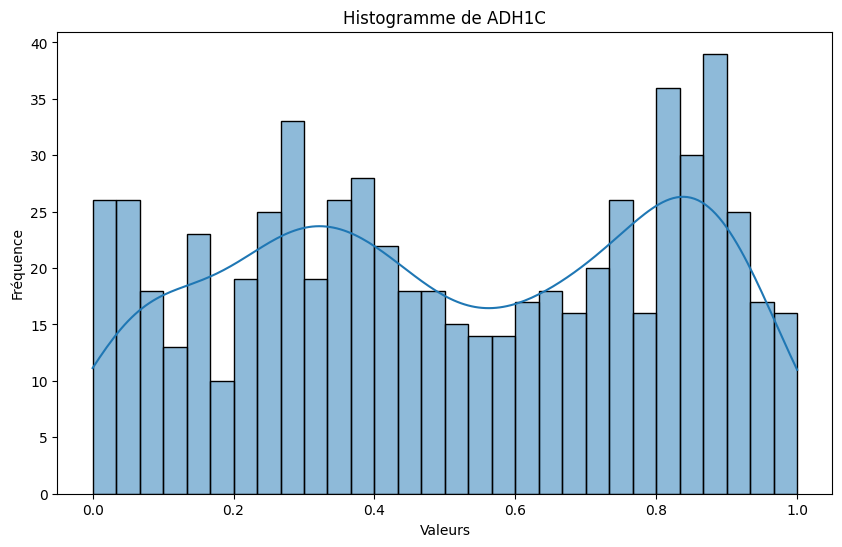

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour une colonne spécifique
plt.figure(figsize=(10, 6))
sns.histplot(X_normalized_df_train['ADH1C'], bins=30, kde=True)
plt.title('Histogramme de ADH1C')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()



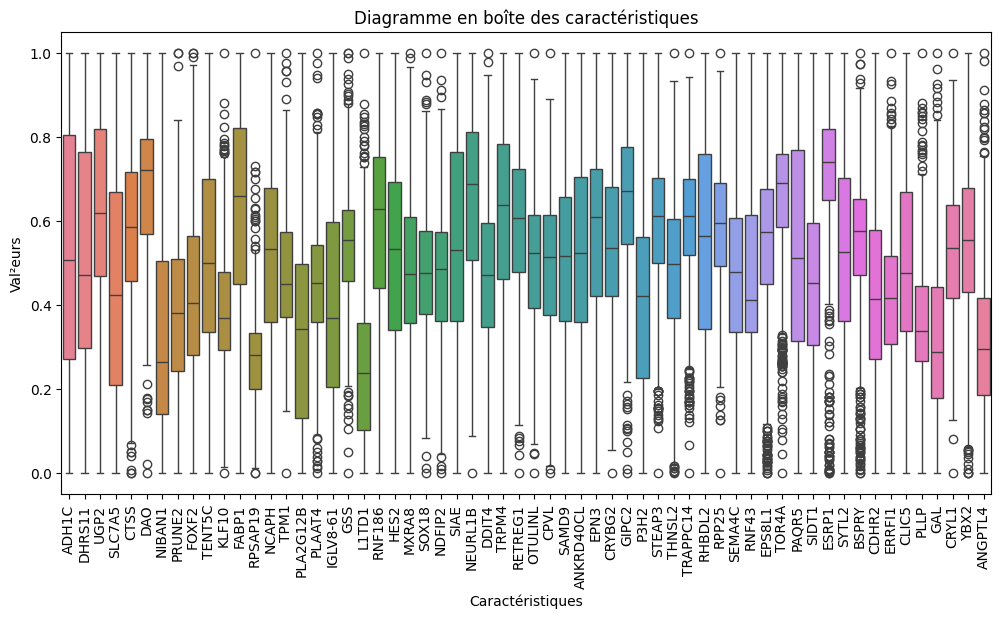

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_normalized_df_train)
plt.title('Diagramme en boîte des caractéristiques')
plt.xlabel('Caractéristiques')
plt.ylabel('Val²eurs')
plt.xticks(rotation=90)
plt.show()


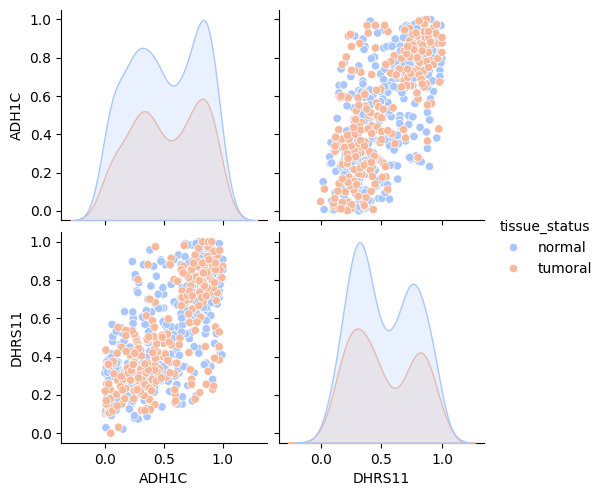

In [ ]:
# Sélectionner quelques gènes pour la visualisation (par exemple, les trois premiers)
gene_subset = X_normalized_df_train[['ADH1C', 'DHRS11']]

sns.pairplot(pd.concat([gene_subset, y], axis=1), hue='tissue_status', palette='coolwarm')
plt.show()

Taux de précision: 99.38%
Matrice de confusion :
 [[79  0]
 [ 1 81]]


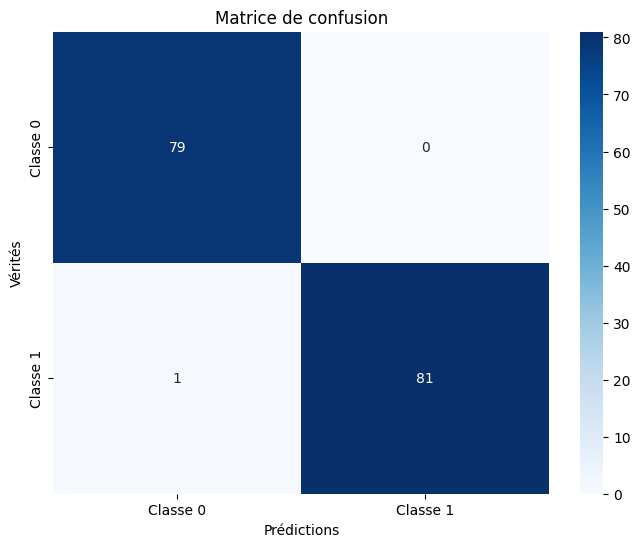

Rapport de classification :
               precision    recall  f1-score   support

      normal       0.99      1.00      0.99        79
     tumoral       1.00      0.99      0.99        82

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Créer un modèle de régression logistique
log_reg = LogisticRegression()
# Entraîner le modèle
log_reg = LogisticRegression()
log_reg.fit(X_normalized_train, y_train)
y_pred = log_reg.predict(X_normalized_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Taux de précision: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Visualiser la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

# Afficher un rapport de classification détaillé
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Meilleurs paramètres : {'C': 10, 'gamma': 0.1}
Taux de précision pour SVM avec meilleurs paramètres : 100.00%
Matrice de confusion SVM avec meilleurs paramètres :
 [[79  0]
 [ 0 82]]


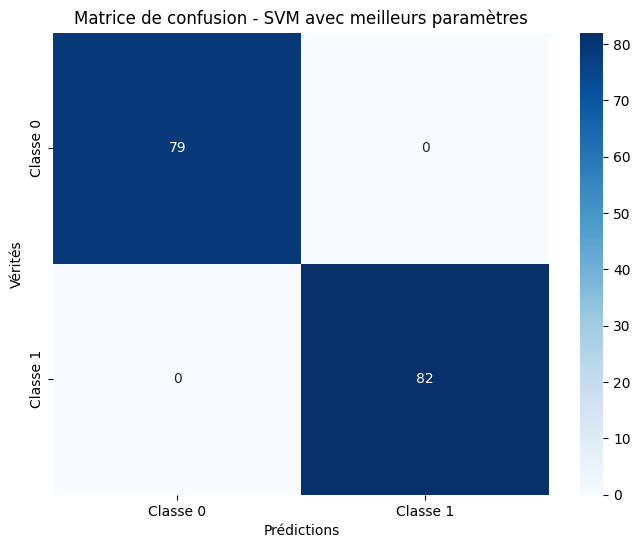

Rapport de classification SVM avec meilleurs paramètres :
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        79
     tumoral       1.00      1.00      1.00        82

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Créer le modèle SVM
svm_model = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_normalized_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
y_pred_svm_best = grid_search.predict(X_normalized_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"Taux de précision pour SVM avec meilleurs paramètres : {accuracy_svm_best * 100:.2f}%")

# Afficher la matrice de confusion
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print("Matrice de confusion SVM avec meilleurs paramètres :\n", conf_matrix_svm_best)

# Visualiser la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - SVM avec meilleurs paramètres')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

# Afficher un rapport de classification détaillé
print("Rapport de classification SVM avec meilleurs paramètres :\n", classification_report(y_test, y_pred_svm_best))


In [ ]:
import pandas as pd

# Extraire les coefficients du modèle de régression logistique
coef_lr = log_reg.coef_[0]

feature_names = X_normalized_df_train.columns

feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef_lr
})

# Trier par importance (absolue des coefficients)
feature_importance_lr['AbsCoefficient'] = abs(feature_importance_lr['Coefficient'])
feature_importance_lr = feature_importance_lr.sort_values(by='AbsCoefficient', ascending=False)

# Afficher les top 1, 2 et 3 caractéristiques
print("Top caractéristiques pour la Régression Logistique avec données normalisées :")
print(feature_importance_lr.head(3))


Top caractéristiques pour la Régression Logistique avec données normalisées :
   Feature  Coefficient  AbsCoefficient
3   SLC7A5     2.192431        2.192431
44   RNF43     1.882977        1.882977
2     UGP2    -1.773761        1.773761


In [ ]:
import pandas as pd
from sklearn.svm import SVC

# Assurer que vous avez les noms de caractéristiques
feature_names = X_normalized_df_train.columns
svm_model = SVC(kernel='linear')
svm_model.fit(X_normalized_df_train, y_train)
if hasattr(svm_model, 'coef_'):
    coef_svm = svm_model.coef_[0]
    feature_importance_svm = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef_svm
    })
    feature_importance_svm['AbsCoefficient'] = abs(feature_importance_svm['Coefficient'])
    feature_importance_svm = feature_importance_svm.sort_values(by='AbsCoefficient', ascending=False)
    print("Top caractéristiques pour le SVM avec données normalisées :")
    print(feature_importance_svm.head(3))
else:
    print("Le modèle SVM utilisé n'est pas linéaire ou ne possède pas d'attribut 'coef_'")


Top caractéristiques pour le SVM avec données normalisées :
   Feature  Coefficient  AbsCoefficient
44   RNF43     1.392024        1.392024
2     UGP2    -0.972119        0.972119
5      DAO    -0.900447        0.900447


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Liste des caractéristiques utilisées dans les données d'entraînement
feature_names = X_normalized_df_train.columns.tolist()

# Données du patient
new_patient = {'RNF43': 4.68, 'SLC7A5': 4.10, 'DAO': 7.59}

new_patient_df = pd.DataFrame([{**dict.fromkeys(feature_names, 0), **new_patient}])
scaler = StandardScaler()
scaler.fit(X_normalized_df_train)
new_patient_normalized = scaler.transform(new_patient_df)
probability_lr = log_reg.predict_proba(new_patient_normalized)[0][1]
prediction_lr = log_reg.predict(new_patient_normalized)[0]

print(f"Probabilité prédite pour le cancer du côlon avec la régression logistique : {probability_lr:.2f}")
print(f"Le patient est prédite comme atteint du cancer du côlon : {'tumoral' if prediction_lr == 1 else 'normal'}")


Probabilité prédite pour le cancer du côlon avec la régression logistique : 1.00
Le patient est prédite comme atteint du cancer du côlon : normal


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données du patient avec le même scaler
new_patient_normalized = scaler.transform(new_patient_df)
probability_svm = svm_model.decision_function(new_patient_normalized)  # Valeur de décision du modèle SVM
prediction_svm = svm_model.predict(new_patient_normalized)[0]

print(f"Probabilité prédite pour le cancer du côlon avec le SVM : {probability_svm[0]:.2f}")
print(f"Le patient est prédite comme atteint du cancer du côlon : {'tumoral' if prediction_svm == 1 else 'Normal'}")


Probabilité prédite pour le cancer du côlon avec le SVM : 30.65
Le patient est prédite comme atteint du cancer du côlon : Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Meilleurs paramètres pour k-NN : {'n_neighbors': 7}
Taux de précision pour k-NN avec meilleurs paramètres : 100.00%
Matrice de confusion pour k-NN :
 [[79  0]
 [ 0 82]]


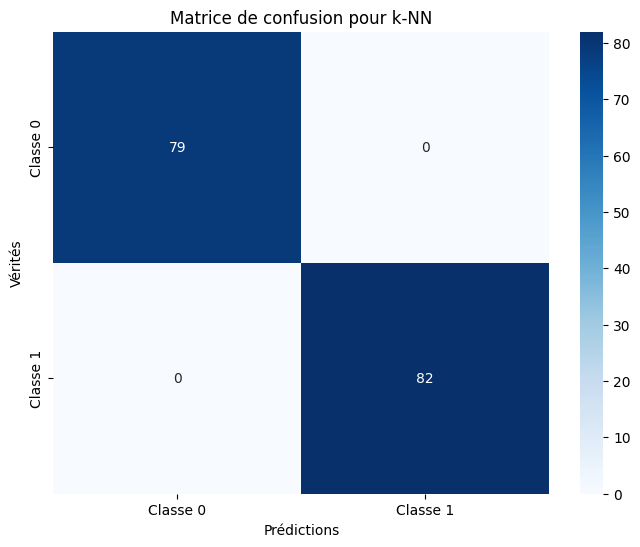

Rapport de classification pour k-NN :
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        79
     tumoral       1.00      1.00      1.00        82

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Définir les paramètres à tester pour k-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13]
}

# Créer le modèle k-NN
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_normalized_train, y_train)
print("Meilleurs paramètres pour k-NN :", grid_search_knn.best_params_)
y_pred_knn_best = grid_search_knn.predict(X_normalized_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"Taux de précision pour k-NN avec meilleurs paramètres : {accuracy_knn_best * 100:.2f}%")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
print("Matrice de confusion pour k-NN :\n", conf_matrix_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion pour k-NN')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()
print("Rapport de classification pour k-NN :\n", classification_report(y_test, y_pred_knn_best))


Taux de précision pour l'arbre de décision : 97.52%
Matrice de confusion pour l'arbre de décision :
 [[76  3]
 [ 1 81]]


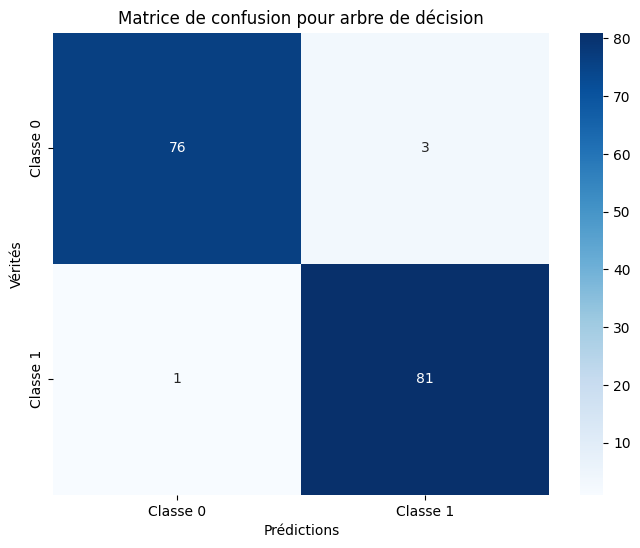

Rapport de classification pour l'arbre de décision :
               precision    recall  f1-score   support

      normal       0.99      0.96      0.97        79
     tumoral       0.96      0.99      0.98        82

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Créer le modèle d'arbre de décision
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_normalized_train, y_train)
y_pred_tree = decision_tree.predict(X_normalized_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Taux de précision pour l'arbre de décision : {accuracy_tree * 100:.2f}%")
# Calculer la matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion pour l'arbre de décision :\n", conf_matrix_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion pour arbre de décision')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()
report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de classification pour l'arbre de décision :\n", report_tree)


Taux de précision pour la forêt aléatoire : 99.38%
Matrice de confusion pour la forêt aléatoire :
 [[79  0]
 [ 1 81]]
Matrice de confusion pour l'arbre de décision :
 [[76  3]
 [ 1 81]]


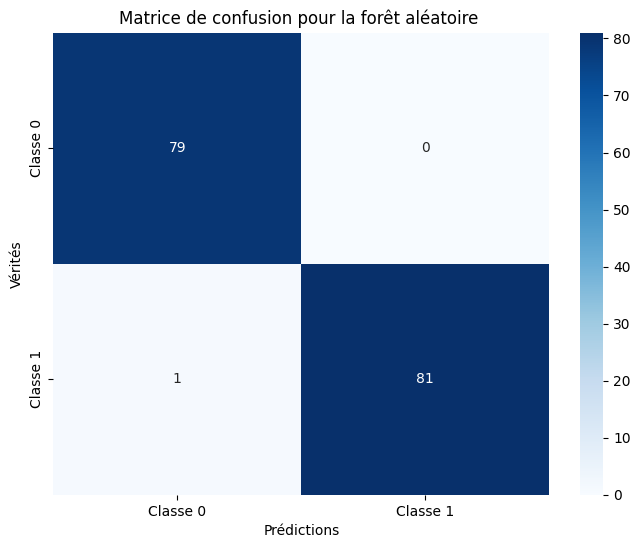

Rapport de classification pour la forêt aléatoire :
               precision    recall  f1-score   support

      normal       0.99      1.00      0.99        79
     tumoral       1.00      0.99      0.99        82

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Créer le modèle de forêt aléatoire
random_forest = RandomForestClassifier()
random_forest.fit(X_normalized_train, y_train)

# Évaluer le modèle
y_pred_forest = random_forest.predict(X_normalized_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Taux de précision pour la forêt aléatoire : {accuracy_forest * 100:.2f}%")

# Calculer la matrice de confusion
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Matrice de confusion pour la forêt aléatoire :\n", conf_matrix_forest)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion pour l'arbre de décision :\n", conf_matrix_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion pour la forêt aléatoire ')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()
report_forest = classification_report(y_test, y_pred_forest)
print("Rapport de classification pour la forêt aléatoire :\n", report_forest)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Créer et entraîner un modèle d'arbre de décision
dt_model = DecisionTreeClassifier()
dt_model.fit(X_normalized_train, y_train)
importances_dt = dt_model.feature_importances_
feature_names = X_normalized_df_train.columns
importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_dt
}).sort_values(by='Importance', ascending=False)
print("Caractéristiques les plus importantes pour l'arbre de décision :")
print(importance_df_dt)


Caractéristiques les plus importantes pour l'arbre de décision :
      Feature  Importance
2        UGP2    0.927324
3      SLC7A5    0.047949
44      RNF43    0.012363
8       FOXF2    0.008217
41     RHBDL2    0.004147
39     THNSL2    0.000000
43     SEMA4C    0.000000
42      RPP25    0.000000
40   TRAPPC14    0.000000
0       ADH1C    0.000000
38     STEAP3    0.000000
46      TOR4A    0.000000
37       P3H2    0.000000
36      GIPC2    0.000000
35     CRYBG2    0.000000
34       EPN3    0.000000
45     EPS8L1    0.000000
48      SIDT1    0.000000
47      PAQR5    0.000000
32      SAMD9    0.000000
49      ESRP1    0.000000
50      SYTL2    0.000000
51      BSPRY    0.000000
52      CDHR2    0.000000
53     ERRFI1    0.000000
54      CLIC5    0.000000
55       PLLP    0.000000
56        GAL    0.000000
57      CRYL1    0.000000
58       YBX2    0.000000
33  ANKRD40CL    0.000000
30    OTULINL    0.000000
31       CPVL    0.000000
1      DHRS11    0.000000
4        CTSS    0.000000

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


rf_model = RandomForestClassifier()
rf_model.fit(X_normalized_train, y_train)


importances_rf = rf_model.feature_importances_
feature_names = X_normalized_df_train.columns


importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)


print("Caractéristiques les plus importantes pour la forêt aléatoire :")
print(importance_df_rf)


Caractéristiques les plus importantes pour la forêt aléatoire :
      Feature  Importance
2        UGP2    0.157297
5         DAO    0.126146
3      SLC7A5    0.124119
26    NEURL1B    0.090546
44      RNF43    0.086361
0       ADH1C    0.065318
54      CLIC5    0.036353
1      DHRS11    0.034267
25       SIAE    0.030310
8       FOXF2    0.027991
13      NCAPH    0.022758
6      NIBAN1    0.020920
47      PAQR5    0.020207
41     RHBDL2    0.019407
9      TENT5C    0.019241
27      DDIT4    0.011434
37       P3H2    0.008031
11      FABP1    0.007919
49      ESRP1    0.006922
29    RETREG1    0.006900
4        CTSS    0.006843
15   PLA2G12B    0.006591
14       TPM1    0.005983
32      SAMD9    0.005973
12    RPSAP19    0.004370
31       CPVL    0.003948
52      CDHR2    0.003910
50      SYTL2    0.003740
7      PRUNE2    0.003124
16     PLAAT4    0.003068
19      L1TD1    0.002669
10      KLF10    0.002262
51      BSPRY    0.001760
38     STEAP3    0.001728
36      GIPC2    0.001618


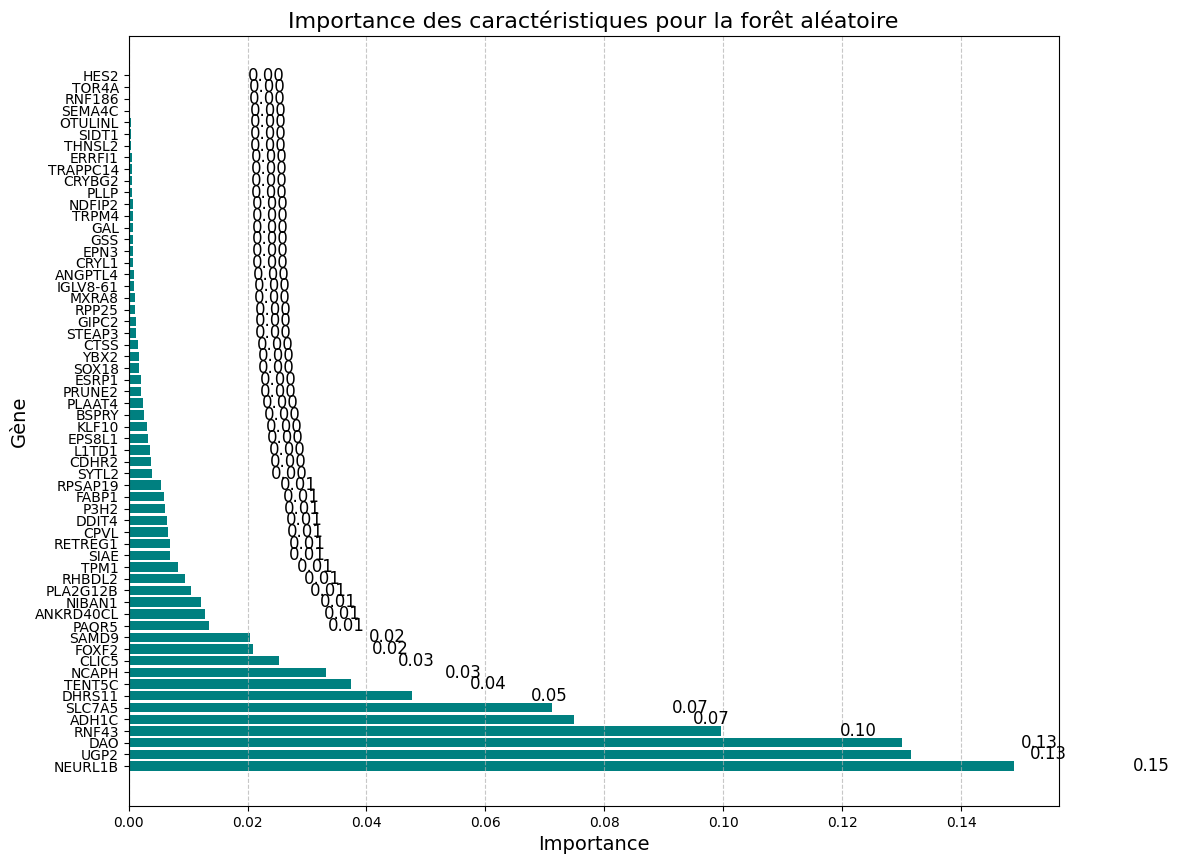

In [ ]:
import matplotlib.pyplot as plt

# Créer le graphique avec une meilleure mise en forme
plt.figure(figsize=(12, 10))
bars = plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='teal')

# Ajouter des labels aux barres
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=12, color='black')

# Ajouter les titres et les labels
plt.title('Importance des caractéristiques pour la forêt aléatoire', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Gène', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
